In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import skimage.io
import matplotlib.pyplot as plt
from skimage import transform
import os
import shutil
from tqdm import tqdm
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "C:/input/"]).decode("utf8"))

In [2]:
def read_image_labels(image_id):
    # most of the content in this function is taken from 'Example Metric Implementation' kernel 
    # by 'William Cukierski'
    image_file = "C:/input/stage1_train/{}/images/{}.png".format(image_id,image_id)
    mask_file = "C:/input/stage1_train/{}/masks/*.png".format(image_id)
    image = skimage.io.imread(image_file)
    masks = skimage.io.imread_collection(mask_file).concatenate()    
    height, width, _ = image.shape
    num_masks = masks.shape[0]
    labels = np.zeros((height, width), np.uint8)
    for index in range(0, num_masks):
        labels[masks[index] > 0] = 255
    return image, labels

def data_aug(image,label,angel=30,resize_rate=0.9):
    flip = random.randint(0, 1)
    size = image.shape[0]
    rsize = random.randint(np.floor(resize_rate*size),size)
    w_s = random.randint(0,size - rsize)
    h_s = random.randint(0,size - rsize)
    sh = random.random()/2-0.25
    rotate_angel = random.random()/180*np.pi*angel
    # Create Afine transform
    afine_tf = transform.AffineTransform(shear=sh,rotation=rotate_angel)
    # Apply transform to image data
    image = transform.warp(image, inverse_map=afine_tf,mode='edge')
    label = transform.warp(label, inverse_map=afine_tf,mode='edge')
    # Randomly corpping image frame
    image = image[w_s:w_s+size,h_s:h_s+size,:]
    label = label[w_s:w_s+size,h_s:h_s+size]
    # Ramdomly flip frame
    if flip:
        image = image[:,::-1,:]
        label = label[:,::-1]
    return image, label

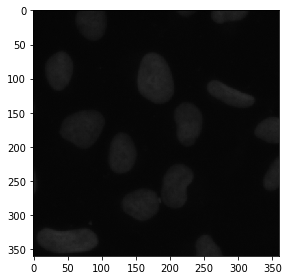

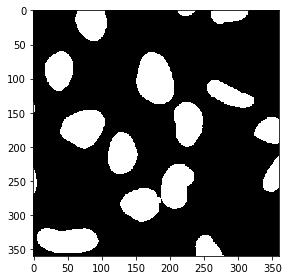

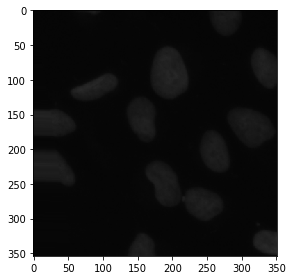

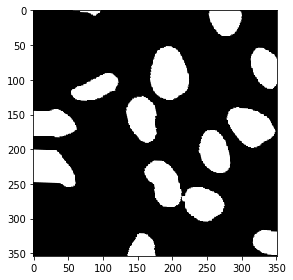

In [3]:
train_dir = "C:/input/stage1_train/"
image_ids  = next(os.walk(train_dir))[1]
#print(image_ids)
image_id = image_ids[random.randint(0,len(image_ids))]
image, labels = read_image_labels(image_id)
#plt.subplot(2,2,1)
skimage.io.imshow(image)
plt.show()
#plt.subplot(2,2,2)
skimage.io.imshow(labels)
plt.show()

new_image, new_labels = data_aug(image,labels,angel=5,resize_rate=0.9)
#plt.subplot(2,2,3)
skimage.io.imshow(new_image)
plt.show()
#plt.subplot(2,2,4)
skimage.io.imshow(new_labels)
plt.show()

In [6]:
def make_data_augmentation(image_ids,split_num):
    for ax_index, image_id in tqdm(enumerate(image_ids),total=len(image_ids)):
        image,labels = read_image_labels(image_id)
        if not os.path.exists("C:/input/stage1_train/{}/augs/".format(image_id)):
            os.makedirs("C:/input/stage1_train/{}/augs/".format(image_id))
        if not os.path.exists("C:/input/stage1_train/{}/augs_masks/".format(image_id)):
            os.makedirs("C:/input/stage1_train/{}/augs_masks/".format(image_id))
            
        # also save the original image in augmented file 
        plt.imsave(fname="C:/input/stage1_train/{}/augs/{}.png".format(image_id,image_id), arr = image)
        plt.imsave(fname="C:/input/stage1_train/{}/augs_masks/{}.png".format(image_id,image_id),arr = labels, cmap='gray')

        for i in range(split_num):
            new_image, new_labels = data_aug(image,labels,angel=5,resize_rate=0.9)
            aug_img_dir = "C:/input/stage1_train/{}/augs/{}_{}.png".format(image_id,image_id,i)
            aug_mask_dir = "C:/input/stage1_train/{}/augs_masks/{}_{}.png".format(image_id,image_id,i)
            plt.imsave(fname=aug_img_dir, arr = new_image)
            plt.imsave(fname=aug_mask_dir,arr = new_labels, cmap='gray')

def clean_data_augmentation(image_ids):
    for ax_index, image_id in tqdm(enumerate(image_ids),total=len(image_ids)):
        if os.path.exists("C:/input/stage1_train/{}/augs/".format(image_id)):
            shutil.rmtree("C:/input/stage1_train/{}/augs/".format(image_id))
        if os.path.exists("C:/input/stage1_train/{}/augs_masks/".format(image_id)):
            shutil.rmtree("C:/input/stage1_train/{}/augs_masks/".format(image_id))


#image_ids = check_output(["ls", "../input/stage1_train/"]).decode("utf8").split()
split_num = 10

In [7]:
make_data_augmentation(image_ids,split_num)
#clean_data_augmentation(image_ids)

100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [29:07<00:00,  2.61s/it]
